In [99]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("/content/data.csv")


<Axes: >

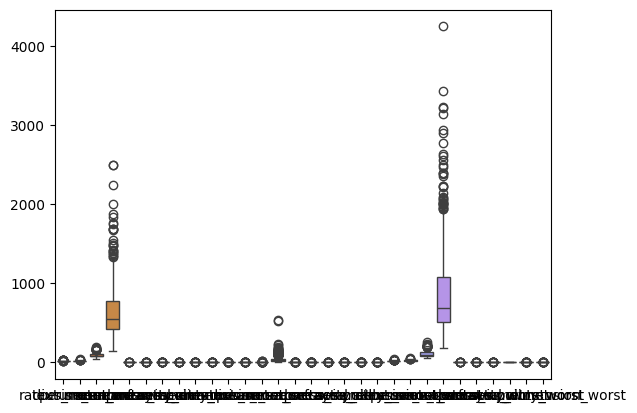

In [100]:
sns.boxplot(df[num])

In [ ]:
df.info()
print(df.iloc[0,-1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.drop('Unnamed: 32',inplace=True,axis=1)

In [ ]:
df.drop('id',inplace=True,axis=1)
num=[]
cat=[]
nc=[]
for i,(name,ty) in enumerate(df.dtypes.items()):
  if ty in ['int64','float64']:
    num.append(name)
    nc.append(i)
  else:
    cat.append(name)

In [ ]:
j=-1;o=0
for i in num:
  q=df[i].quantile([0.25,0.75])
  iqr=q[0.75]-q[0.25]
  j+=1
  for k in range(len(df)):
    if (df.iloc[k,nc[j]]>q[0.75]+iqr) or(df.iloc[k,nc[j]]<q[0.25]-iqr):
      o+=1
print(o)

1226


In [ ]:
le=LabelEncoder()
y=df['diagnosis'].values
x=df.drop('diagnosis',axis=1).values
y=le.fit_transform(y)
xtr,xte,ytr,yte=train_test_split(x,y,random_state=42)


In [ ]:
ada=AdaBoostClassifier()
ada.fit(xtr,ytr)
trainpred=ada.predict(xtr)
testpred=ada.predict(xte)
a=accuracy_score(trainpred,ytr)
b=accuracy_score(testpred,yte)
print(a,b)


1.0 0.951048951048951


In [ ]:
tre=DecisionTreeClassifier(max_depth=10)
logi=LogisticRegression(max_iter=100,solver='liblinear')
neigh=KNeighborsClassifier(n_neighbors=60)
models=[tre,logi,neigh]
models2=[tre,logi]

In [ ]:
for i in models:
  i.fit(xtr,ytr)
  trainpred=i.predict(xtr)
  testpred=i.predict(xte)
  a=accuracy_score(trainpred,ytr)
  b=accuracy_score(testpred,yte)
  print(a,b)


1.0 0.958041958041958
0.9577464788732394 0.958041958041958
0.9061032863849765 0.951048951048951


In [ ]:
for n_es in [25,50,100,200,300]:
  for i in models2:
    model=AdaBoostClassifier(estimator=i,n_estimators=n_es,random_state=8)
    model.fit(xtr,ytr)
    trainpred=model.predict(xtr)
    testpred=model.predict(xte)
    a=accuracy_score(trainpred,ytr)
    b=accuracy_score(testpred,yte)
    print(f'For {n_es} and {i}',a,b)


For 25 and DecisionTreeClassifier(max_depth=10) 1.0 0.951048951048951
For 25 and LogisticRegression(solver='liblinear') 0.9530516431924883 0.965034965034965
For 50 and DecisionTreeClassifier(max_depth=10) 1.0 0.951048951048951
For 50 and LogisticRegression(solver='liblinear') 0.9553990610328639 0.965034965034965
For 100 and DecisionTreeClassifier(max_depth=10) 1.0 0.951048951048951
For 100 and LogisticRegression(solver='liblinear') 0.9577464788732394 0.965034965034965
For 200 and DecisionTreeClassifier(max_depth=10) 1.0 0.951048951048951
For 200 and LogisticRegression(solver='liblinear') 0.960093896713615 0.965034965034965
For 300 and DecisionTreeClassifier(max_depth=10) 1.0 0.951048951048951
For 300 and LogisticRegression(solver='liblinear') 0.9577464788732394 0.958041958041958


In [ ]:
v=VotingClassifier(estimators=[('1',models[0]),('2',models[1]),('3',models[2])],voting="soft")
v.fit(xtr,ytr)
trainpred=v.predict(xtr)
testpred=v.predict(xte)
a=accuracy_score(trainpred,ytr)
b=accuracy_score(testpred,yte)
print(a,b)


0.9882629107981221 0.972027972027972
